# Part I - (Prosper Loan Data Exploration)
## by (Aderinsola Joseph)

## Introduction

This notebook investigates a dataset that includes details on about 113,937 loans. The Prosper loan Dataset, made available by Udacity, is the dataset being used for this research.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset 
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan.describe()


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?
The dataset contains 113,937 rows of loan listings and 81 columnns that represent different variables relating to the loan. by visually assessing the dataset we  discovered that most of the variables are either numerical or categorical and they contain insights that would be usefull to our analysis. 

### What is/are the main feature(s) of interest in your dataset?
When applying to get a loan, different factors are considered by the organization before a decision is made. Our dataset currently contains loads of information and our goal is to understand the factors that can influence loan favorability. Our focus will be to explore this following features:
    
•	ListingCreationDate: The date the listing was created.

•	CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

•	Term:	The length of the loan expressed in months.

•	LoanStatus: The current status of the loan: Cancelled, Charged off, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. 

•	ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

•	ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

•	BorrowerState: The two-letter abbreviation of the state of the address of the borrower at the time the Listing was created.

•	Occupation: The Occupation selected by the Borrower at the time they created the listing.

•	EmploymentStatus: The employment status of the borrower at the time they posted the listing.

•	isBorrowerHomeowner: A Borrower will be classified as a home owner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

•	IncomeRange: The income range of the borrower at the time the listing was created.

•	IncomeVerifiable: The borrower indicated they have the required documentation to support their income.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Variable like the income, occupation, employment status play very important roles when seeking a loan. i would be using this variable to see how spread out our dataset is over certain categories.

In [5]:
#Before performing analysis i need to perform some data cleaning proceedures. 
#First, i would like to correct the datatime column
# create a list of the date columns that needs the data type changed
date_columns = ['ListingCreationDate','ClosedDate','LoanOriginationDate']

# use a for loop to change the columns data type
for col in date_columns:
    loan[col] = pd.to_datetime(loan[col])

In [6]:
#Rename ListingCategory (numeric) and ProsperRating (Alpha) with proper column names
loan = loan.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

# verify code results
for col_name in ['ListingCategory', 'ProsperRating']:
    assert col_name in loan.columns


In [7]:
# Change the numeric listing category to the category titles
category_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map the dictionary contents to the ListingCategory column
loan.ListingCategory = loan.ListingCategory.map(category_titles)

# Preview results
loan.ListingCategory.unique()


array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [8]:
# Replace 'Not employed' with '$0' in IncomeRange entries
loan.IncomeRange = loan.IncomeRange.str.replace('Not employed', '$0')

# Verify changes
assert 'Not employed' not in loan.IncomeRange

In [9]:
# Convert ProsperRating and IncomeRange columns to ordered categorical types
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    loan[key] = loan[key].astype(correct_order)
    


In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null datetime64[ns]
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null datetime64[ns]
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
Prospe

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Question?

##### What are the variations in loan status among the dataset's entries?

### Visualization

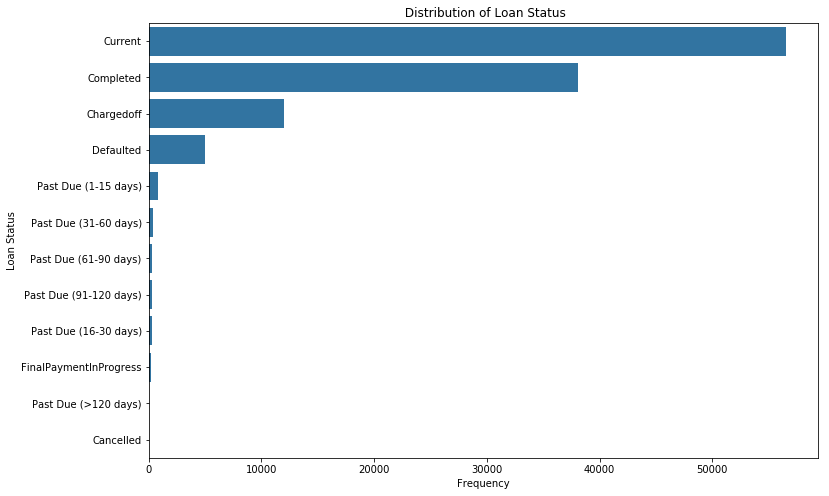

In [11]:
plt.figure(figsize = [12, 8])
color =sb.color_palette()[0]
order = loan.LoanStatus.value_counts().index
sb.countplot(data=loan, y='LoanStatus', color=color, order=order)
plt.title(" Distribution of Loan Status")
plt.xlabel("Frequency")
plt.ylabel("Loan Status");

### Observation

A large portion of the collection is made up of active loans (over 50,000 records). Completed loans make up a sizable chunk of the listings as well (about 20,000 records). Despite the small number of defaulting loans, there are around 5,000 records of charged-off loans, suggesting losses for investors.

### Question

##### What is the distribution of borrower credit grade in our dataset listings?

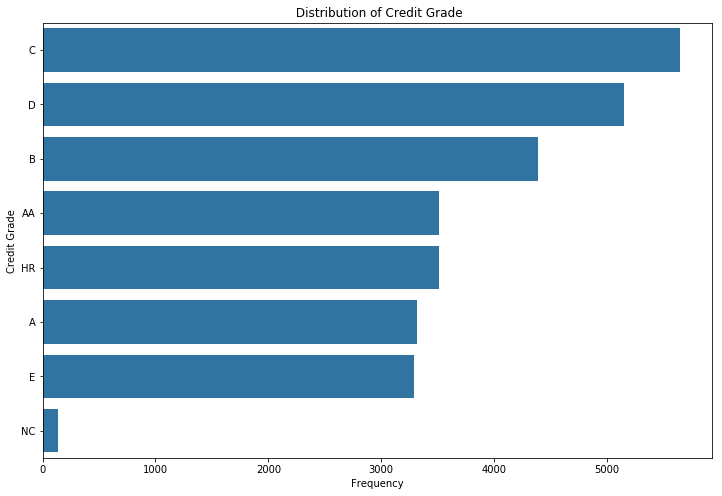

In [12]:
plt.figure(figsize = [12, 8])
color =sb.color_palette()[0]
order = loan.CreditGrade.value_counts().index
sb.countplot(data=loan, y='CreditGrade', color=color, order=order)
plt.title(" Distribution of Credit Grade")
plt.xlabel("Frequency")
plt.ylabel("Credit Grade");

### Observation

When we visualised the credit grade that our customers belong to, we found that the majority of our borrowers were in grades C, D, and B, in that order. The smallest amount of debtors were in grade NC.

### Question 

##### What is the distribution of loan listings among the loan terms that are offered?

### Visualization

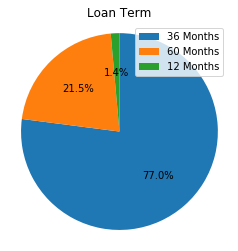

In [13]:
sorted_counts = loan['Term'].value_counts()
plt.pie(sorted_counts, autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.axis('square')
plt.legend(labels=['36 Months','60 Months','12 Months'])
plt.title("Loan Term");

### Observation 

The most common loan term was 36 months (3 years), and the least frequent was 12 months (1 year). Some loans have a 60-month term (5 years)

### Question 

##### How are loan postings distributed among the years and months?

### Visualization

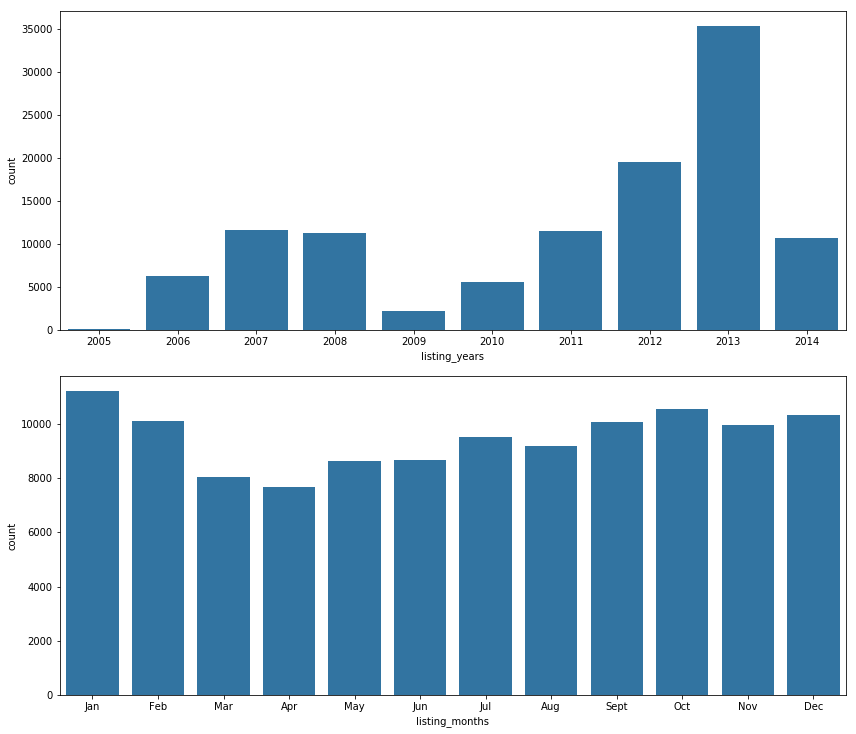

In [14]:
# Store the listing date breakdowns and their plotting indices in a dictionary
listing_breakdown = {
    'listing_years' : [1, loan.ListingCreationDate.dt.year],
    'listing_months' : [2, loan.ListingCreationDate.dt.month],
}

# Plot the required information using a for loop
fig = plt.figure(figsize=(12, 20))

for key, value in listing_breakdown.items():
    plt.subplot(4, 1, value[0])
    sb.countplot(x= value[1], color = sb.color_palette()[0])
    # Replace the month's integer values (0 - 12) with descriptive strings
    if (key == 'listing_months'):
        plt.xticks(np.arange(12), 
                   ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
    plt.xlabel(key)
plt.tight_layout();

### Observation

Over time, there have been more listings, most likely as a result of borrowers being more aware of the prosper site. Since the data was gathered before the year had ended, it is possible that the fact that the loan data was last updated on March 11th, 2014, accounts for the low number of 2014 listings. Loan requests seem to be more frequent from January to February and from September to December, respectively, in the first two and last few months of the year.

### Question 
##### What are the major reasons borrowers take out loans ?

### Visualization

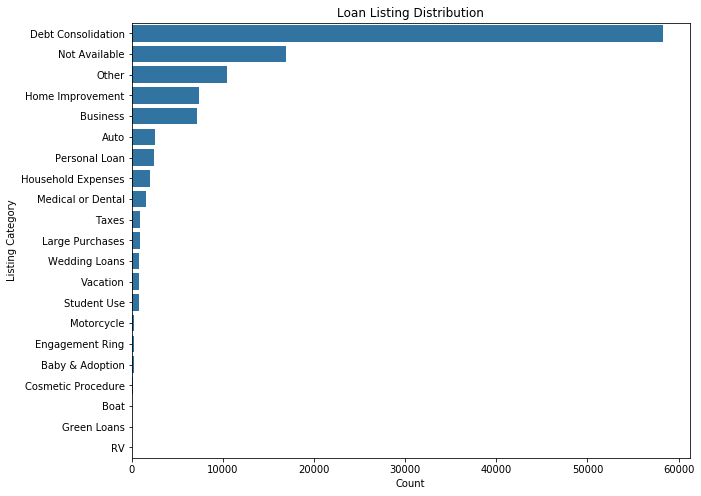

In [15]:
plt.figure(figsize = [10, 8])
color =sb.color_palette()[0]
order = loan["ListingCategory"].value_counts().index
sb.countplot(data=loan, y='ListingCategory', color=color, order=order)
plt.ylabel("Listing Category")
plt.xlabel("Count")
plt.title("Loan Listing Distribution");

### Observation

The main motivation for taking out new loans is debt consolidation. Business loans and loans for home improvements lag behind some loans labelled "Other" or "Not available" to denote that the borrower did not state their rationale. The least number of entries were made for green loans and loans for RVs and boats. People also obtained loans to purchase

### Question 

##### What is the breakdown of borrowers by state across the nation?

### Visualization

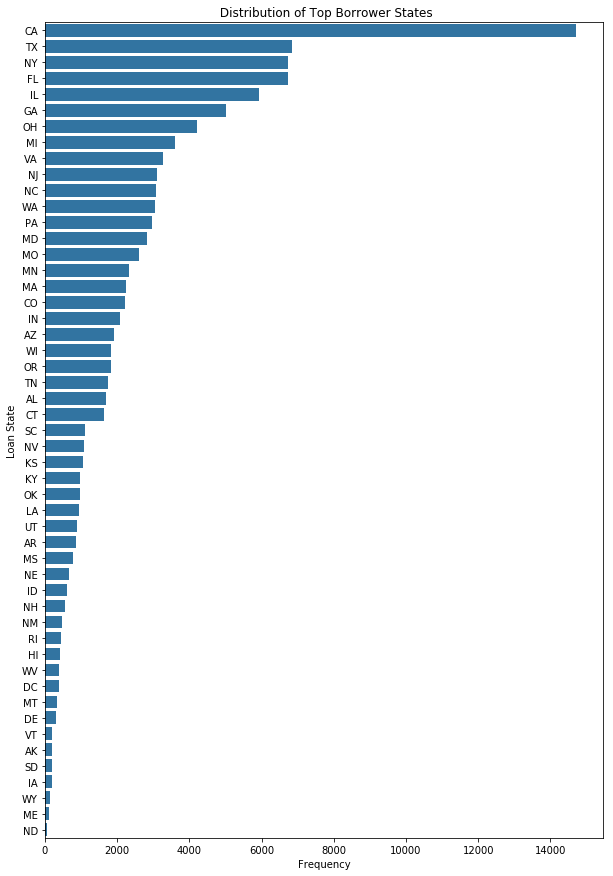

In [16]:
plt.figure(figsize = [10, 15])
color =sb.color_palette()[0]
order = loan["BorrowerState"].value_counts().index
sb.countplot(data=loan, y='BorrowerState', color=color, order=order)
plt.title(" Distribution of Top Borrower States")
plt.xlabel("Frequency")
plt.ylabel("Loan State");

### Visualization 

With almost 10,000 loan postings coming from Californian borrowers, the state has the most listed borrowers overall. Additionally, over 4000 ads each have been supplied by borrowers from New York, Texas, Florida, and Illinois. It's also noteworthy that Prosper is a California-based business. This may help to explain why the majority of borrowers came from there.

### Question 

##### What is the breakdown of borrowers by jobs?

### Visualization

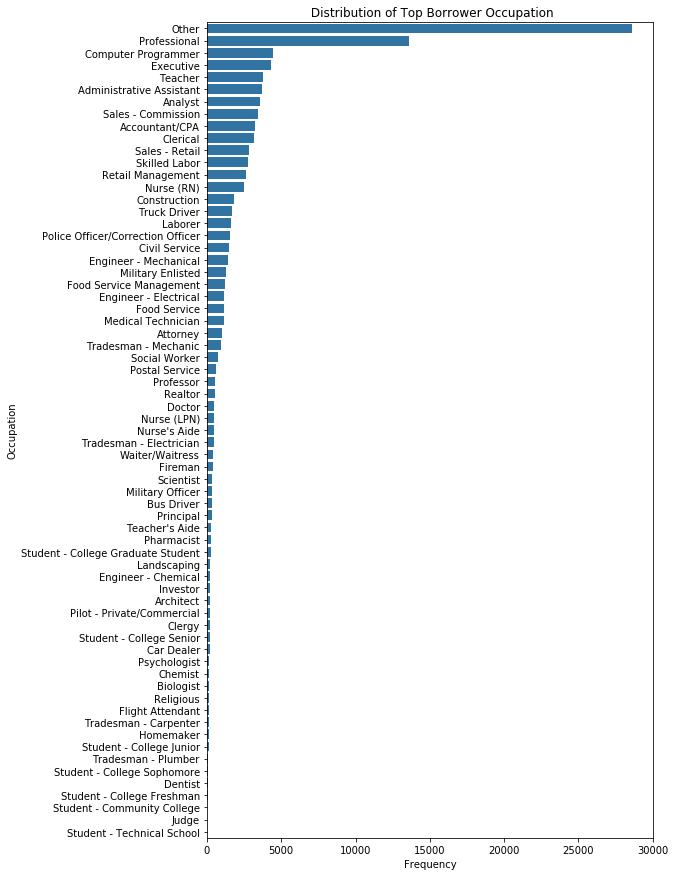

In [17]:
plt.figure(figsize = [8, 15])
color =sb.color_palette()[0]
order = loan["Occupation"].value_counts().index
sb.countplot(data=loan, y='Occupation', color=color, order=order)
plt.title(" Distribution of Top Borrower Occupation")
plt.xlabel("Frequency")
plt.ylabel("Occupation");

### Observation

Many borrowers listed "Others" as their occupation in the Occupation field. However, professionals, computer programmers, and executives hold the three most popular jobs. We have freshmen at technical schools and colleges at the bottom of the list, along with judges.

### Question 
#### How are the loan postings distributed in terms of employment status?

### Visualization

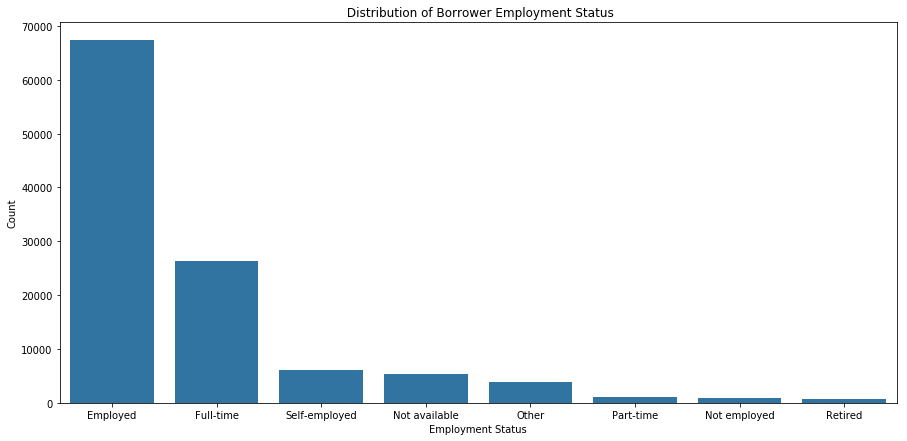

In [18]:
plt.figure(figsize = [15, 7])
color =sb.color_palette()[0]
order = loan["EmploymentStatus"].value_counts().index
sb.countplot(data=loan, x='EmploymentStatus', color=color, order=order)
plt.title(" Distribution of Borrower Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count");

### Observation

The job status pattern demonstrates that the bulk of postings are made by people who are employed. Given how challenging it would be to get a loan without a job, this makes sense.

### Question



### Visualization

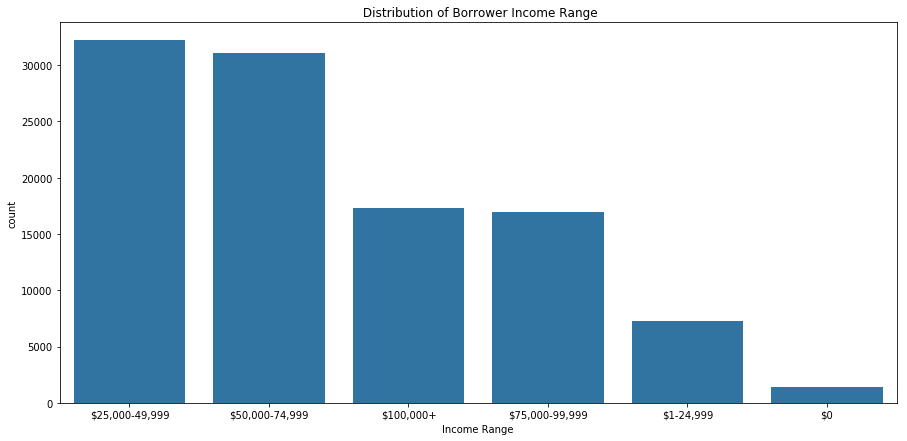

In [19]:
plt.figure(figsize = [15, 7])
color =sb.color_palette()[0]
order = loan["IncomeRange"].value_counts().index
sb.countplot(data=loan, x='IncomeRange', color=color, order=order)
plt.title(" Distribution of Borrower Income Range")
plt.xlabel("Income Range");

### Visualization

Most of the listings pertain to borrowers earning between 25,000 and 74,999 US dollars per annum. Only a few proportion of the listings had borrowers that earned below 25,000 US dollars per annum.


### Question

##### Does the borrower's ownership of a home influence the decision of loan grants?

### Visualization

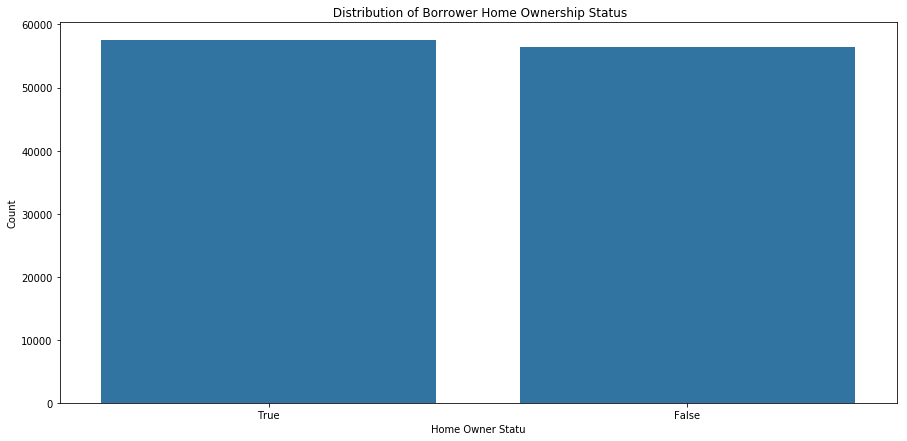

In [20]:
plt.figure(figsize = [15, 7])
color =sb.color_palette()[0]
order = loan["IsBorrowerHomeowner"].value_counts().index
sb.countplot(data=loan, x='IsBorrowerHomeowner', color=color, order=order)
plt.title(" Distribution of Borrower Home Ownership Status")
plt.xlabel("Home Owner Statu")
plt.ylabel("Count");

### Observation

Our analysis shows that the distribution of homeowners and renters is almost equal. Receiving a loan may not always necessitate property ownership.

### Question

##### Does a verified income have an impact on loan decisions?

### Visualization

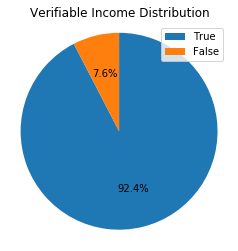

In [21]:
sorted_counts = loan['IncomeVerifiable'].value_counts()
plt.pie(sorted_counts, autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.axis('square')
plt.legend(labels=['True','False'])
plt.title("Verifiable Income Distribution");

### Observation

The ability of borrowers to prove their income was a requirement for 92.4% of the loans approved throughout the time period.

### Question

#### Do the majority of loans have high or low borrower APR values according to the dataset's distribution of borrower APR values?

### Visualization

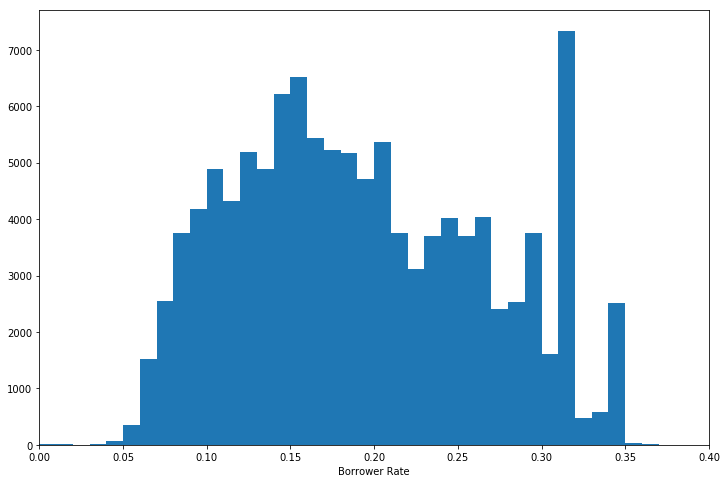

In [22]:
plt.figure(figsize = [12, 8])
bin= np.arange(0, loan['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data= loan, x = 'BorrowerRate', bins= bin)
plt.xlim(0, 0.4)
plt.xlabel('Borrower Rate');

### Question 

#####  How are the values for Debt-to-income ratio distributed?

### Visualization

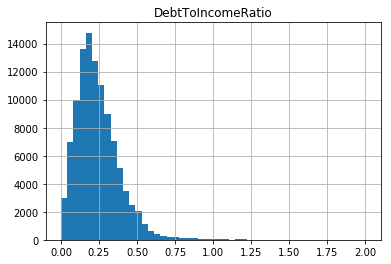

In [23]:
plt.figure(figsize = [15, 7])
bins = np.linspace(0, 2, 50)
loan.hist(column='DebtToIncomeRatio', bins=bins);

### Observation

The data has a little rightward bias. Between 0.20 and 0.25, we observe a peak. This may indicate that borrowers want to keep their debt levels between 25% and 50% of their income. Living within their means seems to be accomplished in this way.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The majority of loans were taken for business and debt consolidation, but there were many additional factors that affected the borrowers' decisions. Many others didn't explain why they were taking the loans, while some others just gave the word "Other" as an answer. Since they didn't make up the majority of the population, this wasn't a serious problem. Therefore, they were insignificant.I checked the borrower's state and found that California has the most borrowers. I examined the borrower's employment situation and found that the majority of them are employed full-time. I also examined the distribution of their occupations and their income range, which mainly falls between ($)25,000 and $74,999.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Little bit of data cleaning was done by changing some variable into categorical data type
and also correcting some label names to make them more appropriate.
I discovered that several loans were obtained in 2013 when I extracted the months and years of the loans from the loan's original date.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question

#####  Is there a relationship between income and house ownership ? 

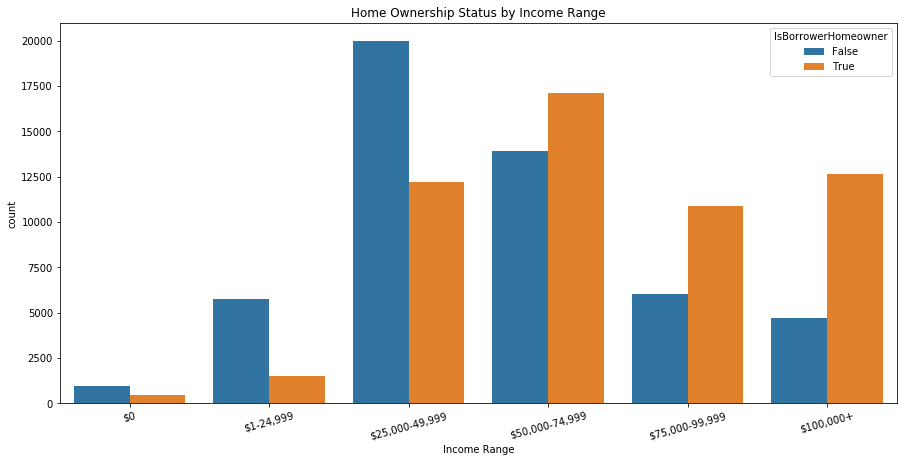

In [24]:
plt.figure(figsize = [15, 7])
order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sb.countplot(data=loan, x='IncomeRange', hue='IsBorrowerHomeowner', order=order)
plt.xticks(rotation=15)
plt.title("Home Ownership Status by Income Range")
plt.xlabel("Income Range");

### Observation

It comes as no surprise that the likelihood of customers owning a home increases with income range. The likelihood of home ownership is nearly 100% higher for borrowers with incomes of 100,000 or more. The declining trend continues through borrowers earning 75k+ and 50k+ until it reaches borrowers earning 25k+, where those who do not own homes outnumber those who do.

### Question

##### Is there a relationship Between Verifiable Income Status and Loan Original Amount ?


### Visualization

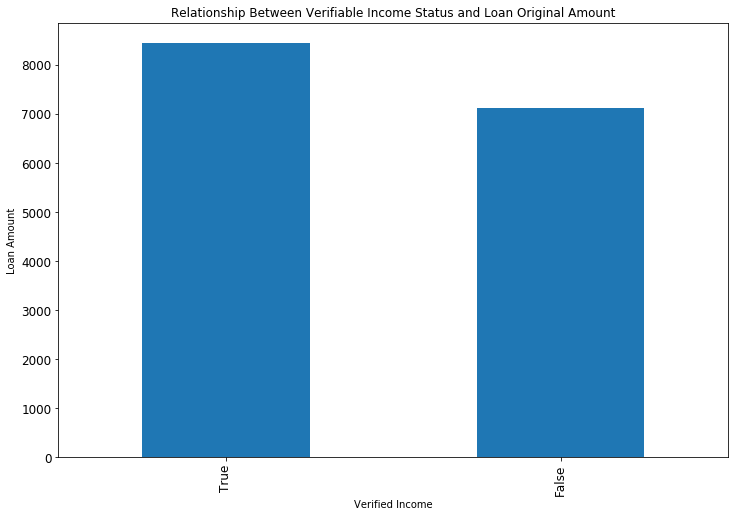

In [25]:
a= loan.groupby('IncomeVerifiable')['LoanOriginalAmount'].mean().sort_values(ascending=False)
plt.figure(figsize = [12, 8])
default_color = sb.color_palette()[0]
a.plot(kind='bar',fontsize=12,color=default_color)
plt.xlabel('Verified Income')
plt.ylabel ('Loan Amount')
plt.title('Relationship Between Verifiable Income Status and Loan Original Amount');

### Observation

According to the figure, borrowers with verified income typically have loans with larger average amounts than borrowers without verified income. This is because there is a correlation between the original amount of a borrower's loan and whether or not their income is verifiable.

### Question

##### What's the connection between LoanOriginalAmount and ListingCategory? What causes, on average, do people seek the biggest loans?

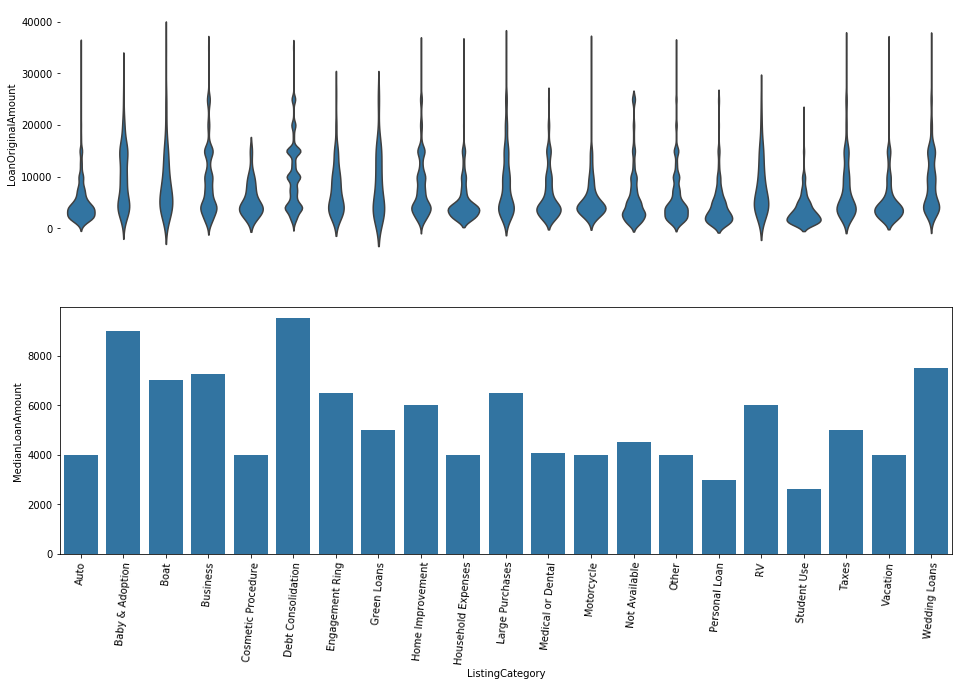

In [26]:
# Compute the median loan amount by listing category
table = loan.groupby('ListingCategory')['LoanOriginalAmount'].median()
table = table.reset_index(name='MedianLoanAmount')

# Create Violinplot visual
plt.figure(figsize=(16, 10))
color =sb.color_palette()[0]
plt.subplot(2,1,1)
sb.violinplot(data=loan.sort_values(by='ListingCategory'), x='ListingCategory', y='LoanOriginalAmount', inner=None, color = color)
# Remove violinplot ticks, labels and spines
plt.xticks([])
plt.xlabel('')
sb.despine(left=True, bottom=True)

# Create barplot
plt.subplot(2,1,2)
sb.barplot(data=table, x='ListingCategory', y='MedianLoanAmount', ci=None,color = color)
plt.xticks(rotation= 85);

### Visualization

The most popular loan requests, on average, are for debt reduction, baby and adoption, businesses, weddings, and the purchase of luxuries like boats. On average, student loans are the smallest loans requested. People appear to be taking out enormous loans for extravagant and possibly incorrect reasons, which is an interesting pattern in this case.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The association between the income range and whether the borrower is a home owner in the graphic above is one intriguing finding from the examination of other variables. In contrast to those in the low income group, persons in the high income level were more likely to be home owners. Over two times as many homeowners as non-homeowners were among the group of those with the highest incomes (100k+). The persons who owned homes in that population were about three times less numerous than those who did not, which was the contrary for those who made the least amount of money (less than $25k).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


*  Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income.
* Borrowers with income ranging from ($)50,000-100,000+ are majorly homeowners

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question

##### How do LoanOriginalAmount, ProsperRating, and IsBorrowerHomeowner relate to one another? Do homeowners generally receive larger loans than non-homeowners?

### Visualization

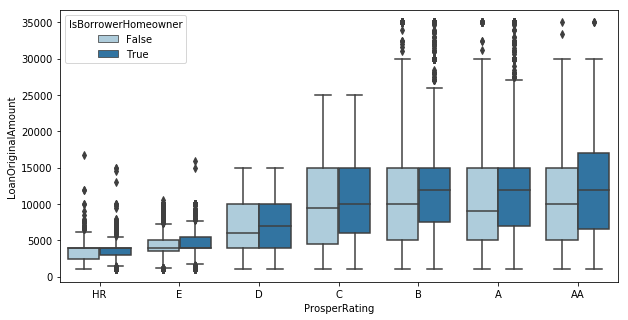

In [27]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=loan, x='ProsperRating', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='Paired');

### Observation

Homeowners receive larger loan amounts on average than non-homeowners across all prosper ratings. When greater loan amounts are involved, possessing a home is a good consideration in addition to other reasons.

### Question
##### What is the loan distribution of borrowers with verifiable income and unverifiable income ?

### Visualization

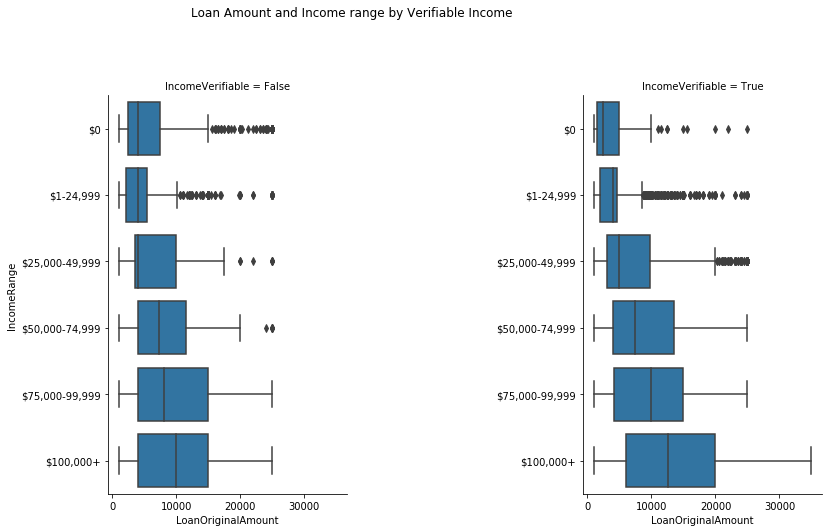

In [29]:
order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
box = sb.FacetGrid(data = loan, col = 'IncomeVerifiable')
box.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order=order)
plt.suptitle('Loan Amount and Income range by Verifiable Income', y = 1.04)
box.fig.set_size_inches(14,8);

### Observation

Borrowers with income of 100k and are able to verify their income are able to access high loan amount than borrowers who's income are not verifiable. 
It seems like borrowers with income of 25k that can't be verified seem to also get moare loans.



### Were there any interesting or surprising interactions between features?

People who make at least $100,000 and have their income validated typically receive loans with bigger initial amounts than those whose income cannot be verified. Borrowers with verifiable incomes frequently receive loans with larger sums.

## Conclusions
In order to understand the various reasons why borrowers request for loans, including the various variables that might affect loan favorability, Prosper loan data were examined.

One of the interesting facts found while examining the distribution of interesting univariables was that California State has the greatest percentage of debtors. When I looked at the borrowers' employment status, I found that the majority of them were either employed or had full-time jobs. Further research into their source of income led me to the conclusion that they typically earn between 25,000 and 74,999 per month, with a right-skewed monthly income distribution, and that they typically make less than $30,000.

Our findings regarding borrower motivations were unexpected. The majority of persons appeared to have used loans to finance existing debt rather than taking out loans to launch enterprises or buy assets. The largest average loan amounts obtained through the platform are for debt consolidation. Aside from using large loans for business objectives, borrowers appear to rely on them to pay for engagement rings, marriages, and adoptions of children and boats.